**Практическое задание по теме «Регрессионный анализ и меры связи»**

*   Рассчитать коэффициент корреляции заболеваемости и смертности
*   Визуализировать динамику заболеваемости и смертности по странам
*   Построить уравнение линейной регрессии по смертям от заболеваемости и вычислите прогноз количества смертей **в России для 25 000 000 случаев заражений**
*   Сделать выводы по полученным данным: коэффициенту корреляции, графикам динамики, параметрам уравнения регрессии и прогнозу

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Загрузка и просмтр данных

In [ ]:
df = pd.read_excel("https://u.netology.ru/backend/uploads/lms/attachments/files/data/50044/data_hw_reg.xlsx")


Просмотр информации:
*   пропусков нет
*   типы данных соответствуют предполагаемым

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1116 non-null   datetime64[ns]
 1   country    1116 non-null   object        
 2   confirmed  1116 non-null   int64         
 3   deaths     1116 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 35.0+ KB


Рассчитаем корреляцию заболеваемости и смертности

In [ ]:
df['confirmed'].corr(df['deaths'])

0.9898359549904744

In [ ]:
# Матрица корреляции
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-102-8e77abf3f4eb>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,confirmed,deaths
confirmed,1.000000,0.989836
deaths,0.989836,1.000000


Динамика заболеваемости по странам

In [ ]:
df_rus = df[df['country'] == 'Russia']
df_us = df[df['country'] == 'US']

In [ ]:
fig = go.Figure()

# кривые
fig.add_trace(go.Scatter(x=df_rus.date, y=df_rus['confirmed'], name="Россия"))
fig.add_trace(go.Scatter(x=df_us.date, y=df_us['confirmed'], name="США"))

# свойства
fig.update_layout(
    title_text='Динамика заболеваемости по странам',
    title_font_size=15,
    yaxis_title='Кол-во заболевших',
)

fig.show()

In [ ]:
fig = go.Figure()

# кривые
fig.add_trace(go.Scatter(x=df_rus.date, y=df_rus['deaths'], name="Россия"))
fig.add_trace(go.Scatter(x=df_us.date, y=df_us['deaths'], name="США"))

# свойства
fig.update_layout(
    title_text='Динамика смертности по странам',
    title_font_size=15,
    yaxis_title='Кол-во умерших',
)

fig.show()

Модель линейной регрессии

In [ ]:
# Формирование выборок Роста и Веса для Мужчин
X = df_rus[['confirmed']]
y = df_rus['deaths']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Коэффициенты

a = lm.intercept_
b = lm.coef_

print(f'Коэффициент прямой {a}', f'Коэффициент наклона прямой {b}', sep = '\n')

Коэффициент прямой -6001.7333299871025
Коэффициент наклона прямой [0.02346225]


In [ ]:
# Предсказание смертности на основе тестовых данных
y_pred = lm.predict(X_test)

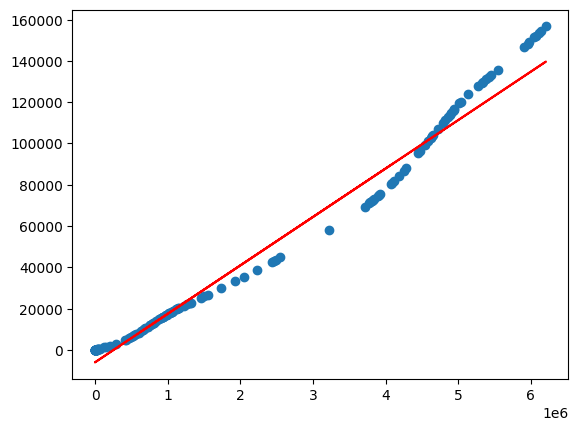

In [ ]:
# Визуализируем прямую
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Вероятно, модель не линейная, однако продолжим.

Спрогнозируем количесво смертей для количества заражений в 25000000

In [ ]:
Deaths_pred = 25000000                    # Кол-во заражений для определения уровня сметности
# regressor.predict([[Deaths_pred]])      # Получение прогноза Линейной регрессии

a + b * Deaths_pred                       # Альтернативный вариант

array([580554.46566038])

In [ ]:
#  Рассчитаем коэффициент детерминации
import sklearn.metrics as metrics

R2 = metrics.r2_score(y_test, y_pred)
R2

0.9815614299566313

<Axes: xlabel='deaths', ylabel='Count'>

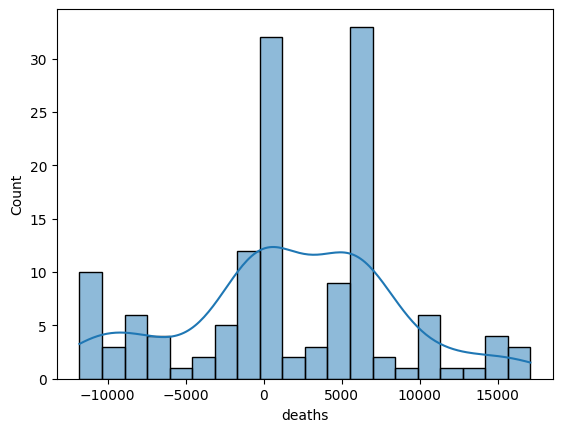

In [ ]:
#  Выведем график остатков
sns.histplot((y_test-y_pred), kde=True, bins=20)

Вывод:

*   Корреляция между заболеваемостью и сметрностью составляет 98,9%. Это означает, что связь между этими переменными очень сильная и положитеная.
*   Судя по графикам динамики заболеваемость (как и сметрность) в России имеет плавный характер, без резких колебаний. В США же имеется резкий подьём заболеваемости (и, как результат, смертности) в период с ноября 2020 года по февраль 2021 года.
*   Коэффициент детерминации 0,98 говорит о том, что прогноз достаточно точный и, соответственно, для зболеваемости в 25000000 уровень смертности будет составлять 580554